In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_features_modified.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_labels.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#check the shape of mon_features
print(mon_features.head())

#check the shape of unmon_features
print(unmon_features.head())

   num_total_packets  sum_packets  num_incoming_packets  \
0               1421       727552                  1300   
1                518       265216                   438   
2               1358       695296                  1240   
3               1446       740352                  1324   
4               1406       719872                  1291   

   frac_incoming_packets  num_outgoing_packets  frac_outgoing_packets  \
0               0.914849                   121               0.085151   
1               0.845560                    80               0.154440   
2               0.913108                   118               0.086892   
3               0.915629                   122               0.084371   
4               0.918208                   115               0.081792   

   average_outgoing_ordering  std_dev_outgoing_ordering  \
0                 773.322314                 515.483953   
1                 226.162500                 139.231951   
2                 786.110169 

In [ ]:
#check the shape of mon_labels
print(mon_labels.head())

#check the shape of unmon_labels
print(unmon_labels.head())

   label
0      0
1      0
2      0
3      0
4      0
   label
0     -1
1     -1
2     -1
3     -1
4     -1


In [ ]:
# Feature settings (written for open world-like code, no need to use concat)
features_combined = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
print(features_combined.head())

   num_total_packets  sum_packets  num_incoming_packets  \
0               1421       727552                  1300   
1                518       265216                   438   
2               1358       695296                  1240   
3               1446       740352                  1324   
4               1406       719872                  1291   

   frac_incoming_packets  num_outgoing_packets  frac_outgoing_packets  \
0               0.914849                   121               0.085151   
1               0.845560                    80               0.154440   
2               0.913108                   118               0.086892   
3               0.915629                   122               0.084371   
4               0.918208                   115               0.081792   

   average_outgoing_ordering  std_dev_outgoing_ordering  \
0                 773.322314                 515.483953   
1                 226.162500                 139.231951   
2                 786.110169 

In [ ]:
# Define scaler functions for data normalization
from sklearn.preprocessing import StandardScaler
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

In [ ]:
import numpy as np
mon_labels = np.ones(len(mon_features))  # Assigning 1 to monitored data
unmon_labels = -np.ones(len(unmon_features))  # Assigning -1 to unmonitored data
labels_combined = np.concatenate([mon_labels, unmon_labels])  # Combining labels

In [ ]:
# Data Split: Separating into training and test datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_combined, labels_combined, test_size=0.2, random_state=50
)

In [ ]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = scaler_samples(X_train, X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Training the SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Predicting with the trained model on test data
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation: Printing accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.7936206896551724
Confusion Matrix
 [[1096  895]
 [ 302 3507]]


### Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC()

# Setting up the hyperparameter grid for search
param_grid = {
    'C': [100, 1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

In [ ]:
# Setting up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=2)

# Executing the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  35.4s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  32.8s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  32.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.5min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.5min
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time= 2.4min


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 1000], 'gamma': [0.1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
# Printing the best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Predicting with the best model on test data
y_pred = best_svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation with the best parameters
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with best parameters\n {conf_matrix}")

Accuracy with best parameters: 0.8351724137931035
Confusion Matrix with best parameters
 [[1383  608]
 [ 348 3461]]


### Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

svm_model = SVC()

In [ ]:
# Setting up the hyperparameter distributions for random search
from scipy.stats import reciprocal, uniform

param_distributions = {
    'C': reciprocal(1, 1000),
    'gamma': expon(scale=0.1),
    'kernel': ['rbf'],
    'class_weight':['balanced', None]
}

In [ ]:
# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=50, cv=2, scoring='accuracy', verbose=2, random_state=50, n_jobs=-1)

# Executing the random search
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e6a0d73f880>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e6a580f97b0>,
                                        'kernel': ['rbf']},
                   random_state=50, scoring='accuracy', verbose=2)

In [ ]:
# Printing the best hyperparameters
print(f"Best parameters: {random_search.best_params_}")
best_svm_model = random_search.best_estimator_

Best parameters: {'C': 218.69176239528974, 'class_weight': None, 'gamma': 0.06980161530282498, 'kernel': 'rbf'}


In [ ]:
# Predicting with the best model on test data
y_pred = best_svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation with the best parameters
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {acc}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with best parameters\n {conf_matrix}")

Accuracy with best parameters: 0.8336206896551724
Confusion Matrix with best parameters
 [[1379  612]
 [ 353 3456]]


### Evaluation Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculating True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

In [ ]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

In [ ]:
# Calculating ROC AUC
roc_auc = auc(fpr, tpr)

In [ ]:
# Calculating Precision-Recall Curve and AUC
precision_values, recall_values, thresholds_pr = precision_recall_curve(y_test, y_pred, pos_label=1)
pr_auc = auc(recall_values, precision_values)

In [ ]:
print(f"True Positive Rate (TPR): {tpr[1]}")
print(f"False Positive Rate (FPR): {fpr[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision-Recall AUC: {pr_auc}")

True Positive Rate (TPR): 0.9086374376476766
False Positive Rate (FPR): 0.3053741838272225
Precision: 0.850577537478496
Recall: 0.9086374376476766
ROC AUC: 0.801631626910227
Precision-Recall AUC: 0.9096074875630862


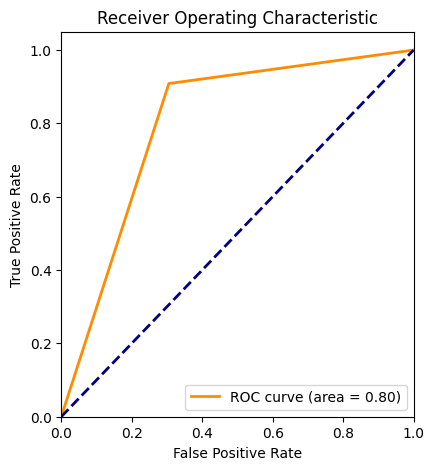

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

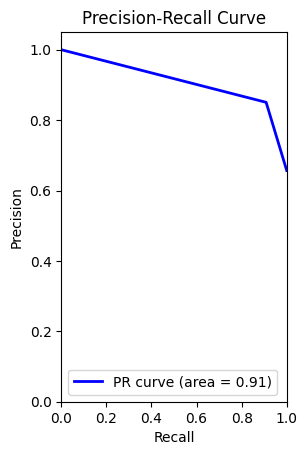

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()